In [2]:
using Distributions
using Random

In [3]:
m = 15
A = rand(Bernoulli(0.5), m)
B = Int.(ones(m) - A) 

15-element Vector{Int64}:
 1
 1
 0
 1
 1
 0
 0
 0
 0
 0
 1
 1
 1
 0
 0

In [4]:
function iter!(A, B)
    shuffle!(A)
    shuffle!(B)
    a, b = A[1], B[1]
    A[1], B[1] = b, a
end

iter! (generic function with 1 method)

In [5]:
t = 100_000_000
walk = zeros(t)
for i in 1:t
    iter!(A, B)
    walk[i] = sum(A)
end 

In [6]:
using Plots; gr()
using StatsPlots
using FreqTables

In [16]:
frequencias = freqtable(walk)

16-element Named Vector{Int64}
Dim1  │ 
──────┼─────────
0.0   │        1
1.0   │      126
2.0   │     7111
3.0   │   133973
4.0   │  1202022
5.0   │  5809474
6.0   │ 16150028
7.0   │ 26700806
8.0   │ 26698291
9.0   │ 16146770
10.0  │  5806938
11.0  │  1203735
12.0  │   133341
13.0  │     7247
14.0  │      136
15.0  │        1

In [17]:
prop(freqtable(walk))

16-element Named Vector{Float64}
Dim1  │ 
──────┼───────────
0.0   │     1.0e-8
1.0   │    1.26e-6
2.0   │   7.111e-5
3.0   │ 0.00133973
4.0   │  0.0120202
5.0   │  0.0580947
6.0   │     0.1615
7.0   │   0.267008
8.0   │   0.266983
9.0   │   0.161468
10.0  │  0.0580694
11.0  │  0.0120374
12.0  │ 0.00133341
13.0  │   7.247e-5
14.0  │    1.36e-6
15.0  │     1.0e-8

In [14]:
norm = Normal(mean(walk), sqrt(var(walk)))

Normal{Float64}(μ=7.4999148, σ=1.392656774706492)

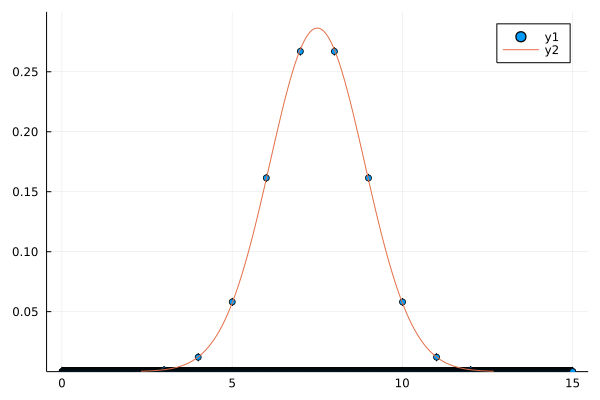

In [15]:
scatterhist(walk, ylims=(1.0e-9,0.3), normalize = :probability)
plot!(norm)

In [7]:
function Tempos(Ts)
    diff = zeros(length(Ts))
    for i in 1:(length(Ts)-1)
        diff[i] = Ts[i+1] - Ts[i] 
    end 
    return diff[1:(end -1)]
end

Tempos (generic function with 1 method)

In [19]:
T_7 = findall(walk .== 7)
b = mean(Tempos(T_7))

3.7452047232283823

In [20]:
T_6 = findall(walk .== 6)
c = mean(Tempos(T_6))

6.191938254963908

In [8]:
T_4 = findall(walk .== 4)
d = mean(Tempos(T_4))

83.17204376198723

In [32]:
Tempos(findall(walk .== 7))

26700805-element Vector{Float64}:
  2.0
  5.0
  5.0
  2.0
 15.0
  1.0
  1.0
  6.0
  2.0
  1.0
  ⋮
  2.0
  1.0
  1.0
 11.0
  1.0
  1.0
  2.0
  4.0
  1.0

In [34]:
function todos_tempos(Walks, m)
    todos_tempos = []
    for i in 1:(m+1)
        tempos = findall(walk .== (i-1))
        todos_tempos = cat(Tempos(tempos), todos_tempos, dims = 1)
    end
    return todos_tempos
end

todos_tempos (generic function with 1 method)

In [35]:
tempos = todos_tempos(walk, m)

99999984-element Vector{Any}:
 398613.0
 379675.0
      1.663393e6
 368866.0
      1.188155e6
 842878.0
      1.0
 457566.0
      1.0
 640937.0
      ⋮
 740071.0
      2.340978e6
 330389.0
 202515.0
 164966.0
 640155.0
 477819.0
      2.073111e6
 985932.0

In [36]:
mean(tempos)

13.965705744512919

In [49]:
scatterhist(tempos, xlims=(0, 700), normalize = :probability)

In [38]:
var(tempos)

3.2214671577830785e6

In [33]:
findall(tempos .== 1)

1-element Vector{Int64}:
 49996460

In [ ]:
todos_tempos = cat(Tempos(T_0), Tempos(T_1), Tempos(T_2), Tempos(T_3), Tempos(T_4), Tempos(T_5), dims = 1)

In [ ]:
histogram(todos_tempos, xlims = (0, 50))

In [ ]:
extrema(todos_tempos)

In [ ]:
mean(todos_tempos)

In [ ]:
var(todos_tempos)

In [ ]:
Geo = Geometric(0.45)

In [ ]:
freqtable(todos_tempos)

In [ ]:
scatterhist((todos_tempos .-1), xlims = (0, 50), normalize = :probability)
scatter!(Geo)